In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('data_science_job.csv')
df.sample()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
5361,19511,city_10,0.895,Male,Has relevent experience,Part time course,Graduate,STEM,10.0,<10,Pvt Ltd,NaN,0.0


# Check Missing Data Percentile

In [22]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

# Extract Those with less than 5 %

In [19]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

# Check Total loss on removing these columns

In [32]:
len(df[cols].dropna())/len(df)

0.8968577095730244

# 11 % loss is not much in case of 20,000 values

In [37]:
new_df = df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

# Check distribution of data using hist and plots

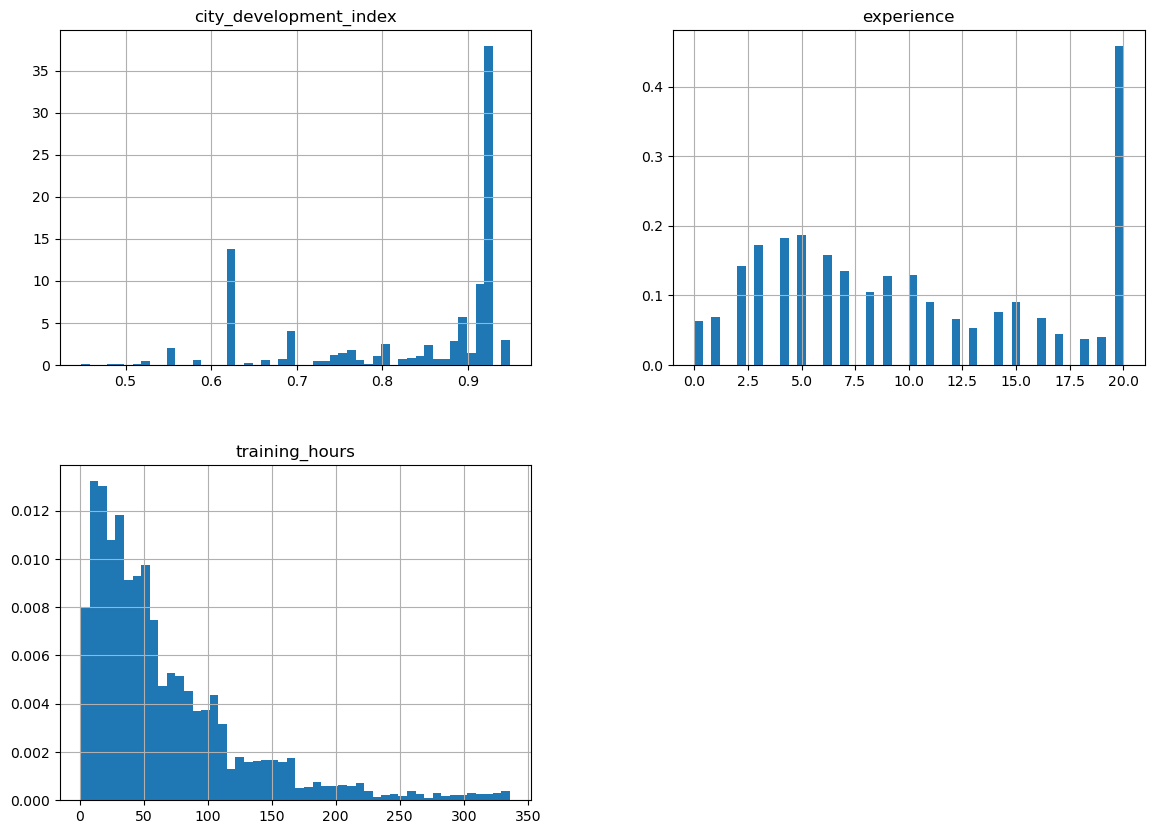

In [49]:
new_df.hist(bins=50,density=True,figsize=(14,10))
plt.show()

In [153]:
def CheckPlot(col):
    # data after cca, the argument alpha makes the color transparent, so we can
    # see the overlay of the 2 distributions
    fig=plt.figure(figsize=(20,5))
    ax1 = plt.subplot(121)
    df[col].hist(bins=50,density=True,ax=ax1,color='blue')
    new_df[col].hist(bins=50,density=True,ax=ax1,color='red',alpha=0.7)

    ax2 = plt.subplot(122)
    df[col].plot.density(color='blue')
    new_df[col].plot.density(color='red')
    
    plt.show()

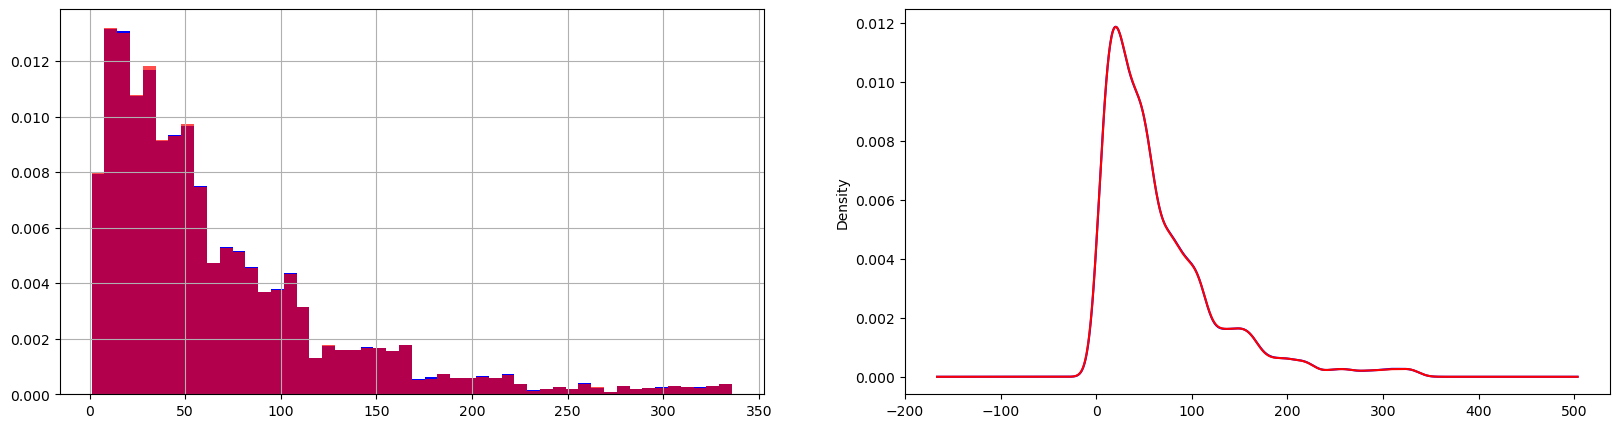

In [155]:
CheckPlot('training_hours')

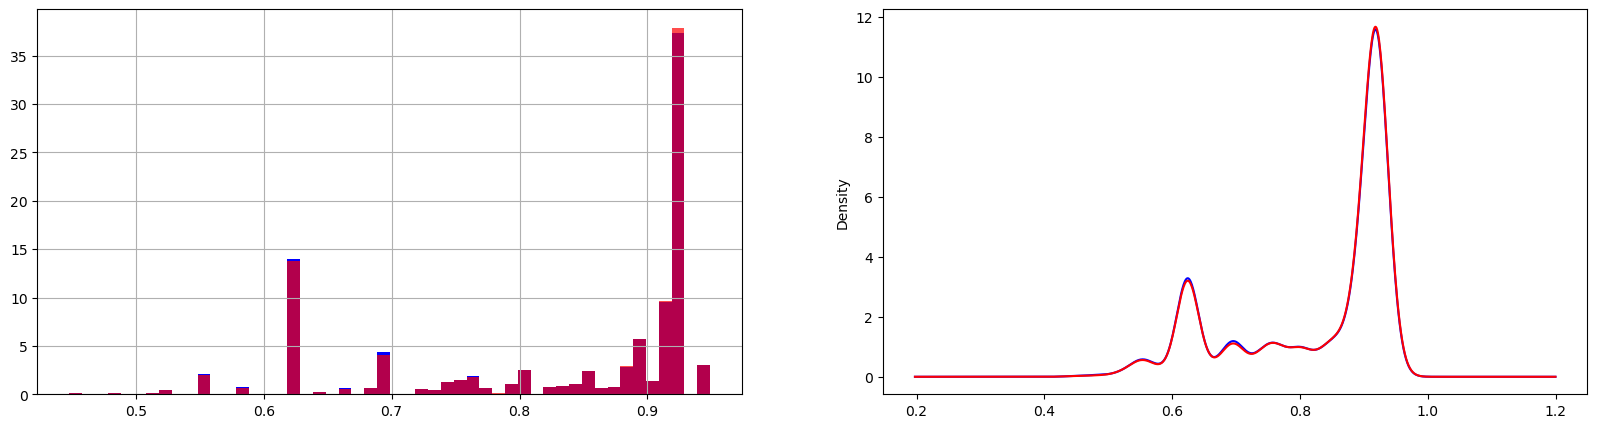

In [156]:
CheckPlot('city_development_index')

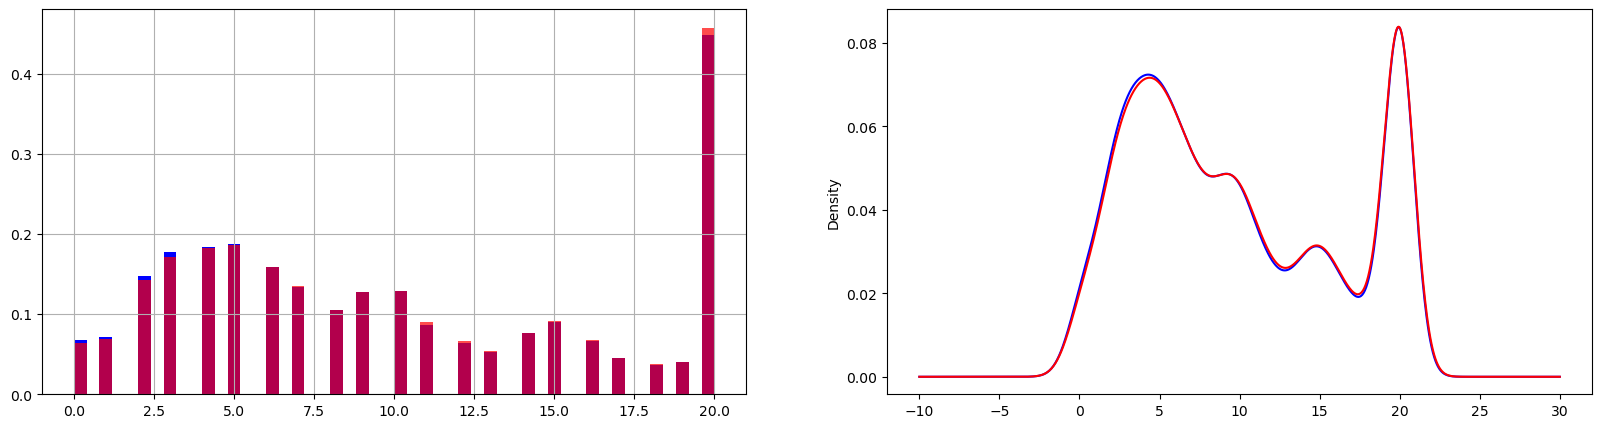

In [159]:
CheckPlot('experience')

# Finally check ratio of Categorical Data

In [174]:
print(df['education_level'].value_counts())
print('\n')
print(new_df['education_level'].value_counts())

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64


education_level
Graduate          10650
Masters            4022
High School        1845
Phd                 380
Primary School      285
Name: count, dtype: int64


In [176]:
print(df['enrolled_university'].value_counts())
print('\n')
print(new_df['enrolled_university'].value_counts())

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64


enrolled_university
no_enrollment       12632
Full time course     3449
Part time course     1101
Name: count, dtype: int64


In [182]:
def CheckRatio(col):
    temp = pd.concat([
        df[col].value_counts()/len(df),
        new_df[col].value_counts()/len(new_df)
    ],axis=1)

    temp.columns=['original','cca']
    print(temp)

In [184]:
CheckRatio('enrolled_university')

                     original       cca
enrolled_university                    
no_enrollment        0.721213  0.735188
Full time course     0.196106  0.200733
Part time course     0.062533  0.064079


In [186]:
CheckRatio('education_level')

                 original       cca
education_level                    
Graduate         0.605387  0.619835
Masters          0.227633  0.234082
High School      0.105282  0.107380
Phd              0.021610  0.022116
Primary School   0.016077  0.016587
